In [1]:
from netCDF4 import Dataset
import numpy as np

In [48]:
# we only keep the topography that is inside this lat-lon extent.
# assuming contiguous extent
lat_verts = np.array([52.,64.,64.])
lon_verts = np.array([-141.,-158.,-127.])

# lat_verts = np.array([-78,71])
# lon_verts = np.array([-162,159])

fn_lon = np.array([-180.0, -150.0, -120.0, -90.0, -60.0, -30.0, 0.0, 30.0, 60.0, 90.0, 120.0, 150.0, 180.0])
fn_lat = np.array([90.0, 60.0, 30.0, 0.0, -30.0, -60.0, -90.0])


class mr_orog_fn(object):
    def __init__(self, lat_verts, lon_verts):
        
        self.lat_verts = lat_verts
        self.lon_verts = lon_verts
        
        self.lat_min = lat_verts.min()
        self.lat_max = lat_verts.max()
        self.lon_min = lon_verts.min()
        self.lon_max = lon_verts.max()
        
        

def get_fns(lat_verts, lon_verts):
    lat_min_idx = compute_idx(lat_verts.min(), 'min', 'lat')
    lat_max_idx = compute_idx(lat_verts.max(), 'max', 'lat')
    
    lon_min_idx = compute_idx(lon_verts.min(), 'min', 'lon')
    lon_max_idx = compute_idx(lon_verts.max(), 'max', 'lon')
    
    print("lat min max:", lat_min_idx, lat_max_idx)
    print("lon min max:", lon_min_idx, lon_max_idx)
    
    print("")
    
    fn = []
    print_lons = True
    lat_pcs = 0
    
    for lat_cnt, lat_idx in enumerate(range(lat_max_idx, lat_min_idx)):
        
        print("lat_cnt, lat_idx, lat_idx+1; fn_ints; NSEW")
        print(lat_cnt, lat_idx, lat_idx+1)
        
        l_lat_bound, r_lat_bound = fn_lat[lat_idx], fn_lat[lat_idx+1]
        l_lat_tag, r_lat_tag = get_NSEW(l_lat_bound, 'lat'), get_NSEW(r_lat_bound, 'lat')
        print(l_lat_bound, r_lat_bound, l_lat_tag, r_lat_tag)
        
        print("")
        
        lon_pcs = 0
        
        for lon_cnt, lon_idx in enumerate(range(lon_min_idx, lon_max_idx)):

            l_lon_bound, r_lon_bound = fn_lon[lon_idx], fn_lon[lon_idx+1]
            l_lon_tag, r_lon_tag = get_NSEW(l_lon_bound, 'lon'), get_NSEW(r_lon_bound, 'lon')
                
            name = "MERIT_%s%.2d-%s%.2d_%s%.3d-%s%.3d.nc4" %(l_lat_tag, np.abs(l_lat_bound), r_lat_tag, np.abs(r_lat_bound), l_lon_tag, np.abs(l_lon_bound), r_lon_tag, np.abs(r_lon_bound))
            fn.append(name)
            
            lon_pcs += 1
                
        print_lons = False
        lat_pcs += 1
        
    return fn, lat_pcs, lon_pcs
            
def get_NSEW(vert, typ):
    if typ == 'lat':
        if vert >= 0.0:
            dir_tag = 'N'
        else:
            dir_tag = 'S'
    if typ == 'lon':
        if vert >= 0.0:
            dir_tag = 'E'
        else:
            dir_tag = 'W'
        
    return dir_tag
    
    
def compute_idx(vert, typ, direction):
    if direction == 'lon':
        fn_int = fn_lon
    else:
        fn_int = fn_lat
    
    sgn = np.sign(vert)
    where_idx = np.argmin(np.abs(fn_int - vert))
    print(fn_int, where_idx)
    
    if typ=='min':
        if (vert - fn_int[where_idx]) < 0.0:
            if direction == 'lon':
                where_idx -= 1
            else:
                where_idx += 1
    elif typ == 'max':
        if (vert - fn_int[where_idx]) > 0.0:
            if direction == 'lon':
                where_idx += 1
            else:
                where_idx -= 1
            
    where_idx = int(where_idx)
            
    print("where_idx, vert, fn_int[where_idx] for typ:")
    print(where_idx, vert, fn_int[where_idx], typ)
    print("")
            
    return where_idx
    
res = get_fns(lat_verts, lon_verts)
print(res)
    

lat_vert_min = lat_verts.min()
lat_vert_max = lat_verts.max()

lat_vert_min_sgn = np.sign(lat_vert_min)
lat_vert_max_sgn = np.sign(lat_vert_max)

lon_vert_min = lon_verts.min()
lon_vert_max = lon_verts.max()

lon_vert_min_sgn = np.sign(lon_vert_min)
lon_vert_max_sgn = np.sign(lon_vert_max)

where_lat_min = np.argmin((np.abs(fn_lat - np.abs(lat_vert_min))))
if (np.abs(lat_vert_min) - fn_lat[where_lat_min]) < 0:
    where_lat_min -= 1
    
where_lat_max = np.argmin((np.abs(fn_lat - np.abs(lat_vert_max))))
if (np.abs(lat_vert_max) - fn_lat[where_lat_max]) > 0:
    where_lat_max += 1

# print(where_lat_min)
# print(where_lat_max)

[ 90.  60.  30.   0. -30. -60. -90.] 1
where_idx, vert, fn_int[where_idx] for typ:
2 52.0 30.0 min

[ 90.  60.  30.   0. -30. -60. -90.] 1
where_idx, vert, fn_int[where_idx] for typ:
0 64.0 90.0 max

[-180. -150. -120.  -90.  -60.  -30.    0.   30.   60.   90.  120.  150.
  180.] 1
where_idx, vert, fn_int[where_idx] for typ:
0 -158.0 -180.0 min

[-180. -150. -120.  -90.  -60.  -30.    0.   30.   60.   90.  120.  150.
  180.] 2
where_idx, vert, fn_int[where_idx] for typ:
2 -127.0 -120.0 max

lat min max: 2 0
lon min max: 0 2

lat_cnt, lat_idx, lat_idx+1; fn_ints; NSEW
0 0 1
90.0 60.0 N N

lat_cnt, lat_idx, lat_idx+1; fn_ints; NSEW
1 1 2
60.0 30.0 N N

(['MERIT_N90-N60_W180-W150.nc4', 'MERIT_N90-N60_W150-W120.nc4', 'MERIT_N60-N30_W180-W150.nc4', 'MERIT_N60-N30_W150-W120.nc4'], 2, 2)


In [49]:
fns = res[0]
lat_pcs = res[1]
lon_pcs = res[2]

# cnt = 0
topo = np.array([], dtype='object')

for fn in fns:
    test = Dataset("/home/ray/Documents/orog_data/MERIT/%s" %fn)

    lat = test['lat']
    lat_min_idx = np.argmin(np.abs(lat - lat_verts.min()))
    lat_max_idx = np.argmin(np.abs(lat - lat_verts.max()))

    lat_high = np.max((lat_min_idx, lat_max_idx))
    lat_low = np.min((lat_min_idx, lat_max_idx))

#     print(lat_verts.min())
#     print(lat_min_idx, lat[lat_min_idx])

#     print(lat_verts.max())
#     print(lat_max_idx, lat[lat_max_idx])

    lon = test['lon']
    lon_min_idx = np.argmin(np.abs(lon - (lon_verts.min())))
    lon_max_idx = np.argmin(np.abs(lon - (lon_verts.max())))

    lon_high = np.max((lon_min_idx, lon_max_idx))
    lon_low = np.min((lon_min_idx, lon_max_idx))


#     print("")
#     print(lon.shape)
#     print(lon[:10], lon[-10:])

#     print(lon_verts.min())
#     print(lon_min_idx, lon[lon_min_idx])

#     print(lon_verts.max())
#     print(lon_max_idx, lon[lon_max_idx])

    # print("")
    print(fn)
    print(lat_low, lat_high, lon_low, lon_high)
    print(lat_high - lat_low, lon_high - lon_low)
    print("")

    # topo = np.append(topo,test['Elevation'][lat_low:lat_high, lon_low:lon_high].reshape(2,2))
    
    topo = test['Elevation'][lat_low:lat_high, lon_low:lon_high]

    test.close()
    
    # break

# topo = topo.reshape(2,2)

# if cnt > 0:
#     if lon_pcs > 0:
#         topo = np.hstack((topo))
        
# else:
#     topo = np.copy(topo_tmp)
    
# del topo_tmp
        
# cnt += 1

MERIT_N90-N60_W180-W150.nc4
31200 35999 26400 35999
4799 9599

MERIT_N90-N60_W150-W120.nc4
31200 35999 0 27600
4799 27600

MERIT_N60-N30_W180-W150.nc4
0 9600 26400 35999
9600 9599

MERIT_N60-N30_W150-W120.nc4
0 9600 0 27600
9600 27600



In [30]:
topo

masked_array(
  data=[[1108, 1107, 1108, ..., 1399, 1394, 1384],
        [1160, 1159, 1161, ..., 1383, 1370, 1351],
        [1204, 1205, 1211, ..., 1377, 1358, 1332],
        ...,
        [1120, 1109, 1090, ..., 1342, 1343, 1343],
        [1214, 1197, 1144, ..., 1340, 1340, 1340],
        [1221, 1218, 1218, ..., 1339, 1337, 1336]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=-32767,
  dtype=int16)

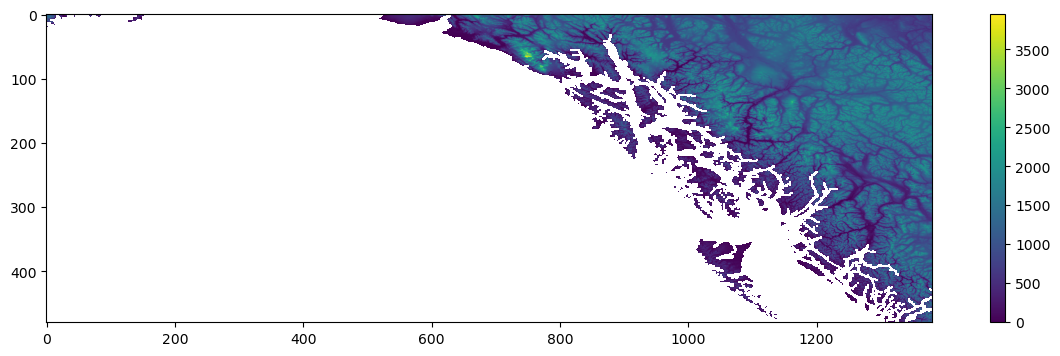

In [40]:
import matplotlib.pyplot as plt

pl_interval = 20

plt.figure(figsize=(15,4))
plt.imshow(topo[::pl_interval,::pl_interval])
plt.colorbar()
plt.show()